# Introduction to Random Forest Classifier

This notebook will use the Iris flower dataset from sklearn to introduce classification with Random Forest.

Feature importance and partial dependency plots will be created once the model is trained.

In [1]:
from IPython.display import VimeoVideo
# Tutorial Video Name: Data Science Software
VimeoVideo('637660493', width=720, height=480)


https://vimeo.com/637660493

# Overview

1. Set up train-test data
1. Review decision trees
1. Visualize a decision tree
1. Introduction to random forest
1. Train and predict with a random forest
1. Visualize feature importances
1. Create partial dependency plots for random forest
1. Knowledge check and questions

## Prerequisites

- Python imports
- Train-test split
- Classification metrics
- Decision Trees
- Measures of node impurity (Shannon Entropy and Gini Index)

# Learning Objectives

1. Apply a random forest classifier to a dataset
1. Visualize feature importances from a trained random forest model

# Dependencies
This notebook was made with the following packages:
1. python=3.7.6
1. sklearn=0.22.1
1. matplotlib=3.1.3
1. pandas=1.0.1

# Set up data set 

In [1]:
import pandas as pd
from sklearn import datasets
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['label'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [2]:
df.shape

(150, 6)

In [3]:
df.label.value_counts()

setosa        50
versicolor    50
virginica     50
Name: label, dtype: int64

## Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[data.feature_names], 
    df['label'], 
    random_state=42,
    stratify=df['label']
)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


# Decision Tree Review

We will first build a decision tree model to review their structure before moving on to random forest classification

In [6]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [7]:
dt = DecisionTreeClassifier(random_state=42)
mdl = dt.fit(X_train, y_train)

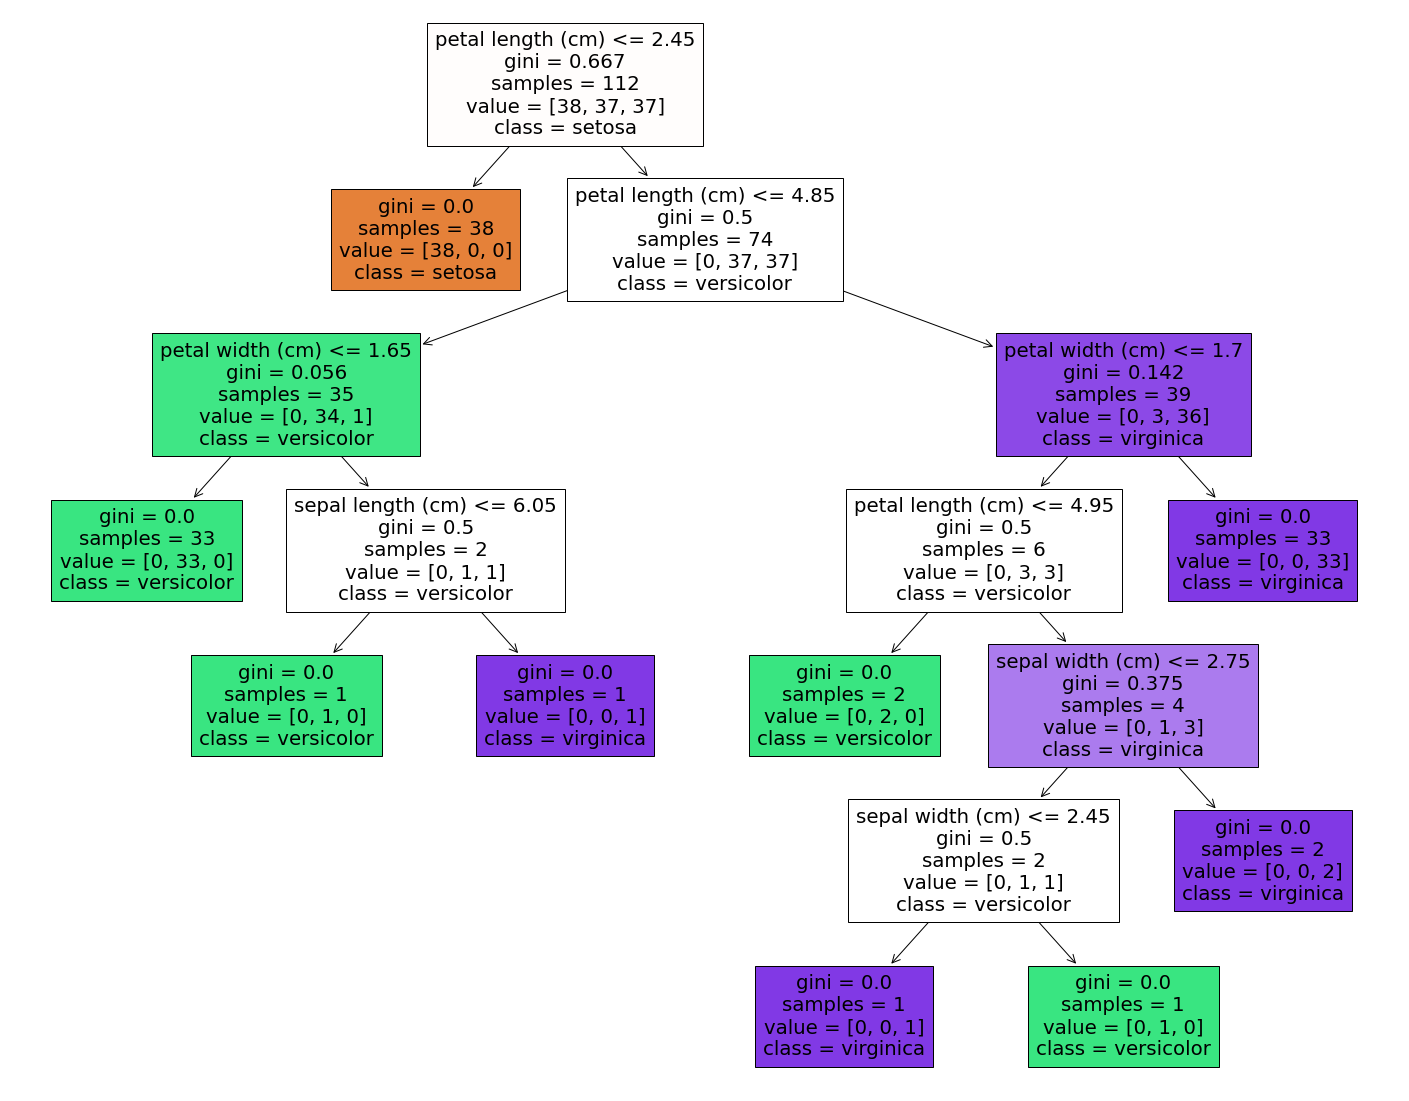

In [8]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=data.feature_names,  
                   class_names=data.target_names,
                   filled=True)

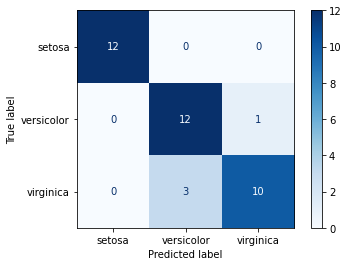

In [9]:
from sklearn.metrics import plot_confusion_matrix

predicted_labels = dt.predict(X_test)
plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues)

In [10]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score
)

def print_metrics(y_test, y_pred):
    scores = [accuracy_score, recall_score, precision_score, f1_score]
    s_labels = ['Accuracy', 'Recall', 'Precision', 'F1']
    for score, s_label in zip(scores, s_labels):
        if s_label == 'Accuracy':
            print(s_label + ': ' + str(round(score(y_test, y_pred), 2)))
        else:
            print(s_label + ': ' + str(round(score(y_test, y_pred, average='weighted'), 2)))

In [11]:
print_metrics(y_test, predicted_labels)

Accuracy: 0.89
Recall: 0.89
Precision: 0.9
F1: 0.89


# Decision Tree Knowledge
1. Are decision trees deterministic?
    - Yes they are deterministic. The best split will be found at each iterative step and will be used. 
1. How are decision trees split determined?
    - Information gain or entropy reduction
1. Are decision trees parametric? 
    - No, they are not parametric. Splits may differ in direction based on values.
1. Decision trees often have high variance, why might that be?
    - May split on wrong features or overfit to data.

# From tree to forest

1. How might multiple decision trees be leveraged to reduce variance?
    1. Create multiple classifiers and average the results. Multiple weak learners can ofter produce a strong learner.
1. Would multiple deterministic decision trees be useful?
    1. Only if they were NOT deterministic.
1. How could they not be deteministic?
    1. Bootstrapping data and limiting features at each step

# Random Forest
-An ensemble method that combines many decision trees which have been given different subsets of the data and features to create a strong learner 

-Decision made on majority vote

-Reduces variance and creates a non-deterministic model

-Generally use a large number of bushy trees

-Can get excellent performance with minimum tuning


# Random Forest Example

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

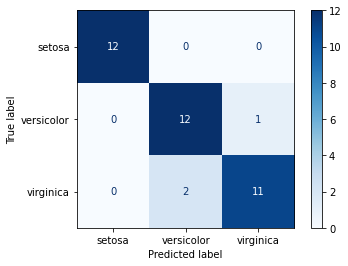

In [13]:
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues)

In [14]:
print_metrics(y_test, rf_preds)

Accuracy: 0.92
Recall: 0.92
Precision: 0.92
F1: 0.92


# Visualizing trees in the forest

In [15]:
def plot_tree(est_num=0):
    fn=data.feature_names
    cn=data.target_names
    tree.plot_tree(rf.estimators_[est_num],
                   feature_names = fn, 
                   class_names = cn,
                   filled = True)

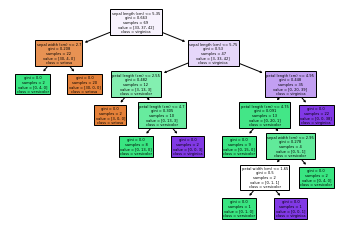

In [16]:
plot_tree(est_num=0)

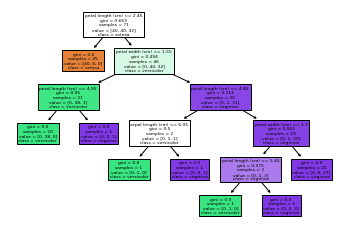

In [17]:
plot_tree(est_num=1)

Focusing only on the first split in the two trees above, we can see differences in the splits used to build the forest.

The first one split on sepal lenth <= 5.35 and the second on petal length <=2.45. The depth of the trees also varies. This is due to the randomness induced in the trees with bootstrapping and feature selection. 


# Random Forest Feature Importances

In [18]:
ft_import = pd.DataFrame()
ft_import['Features'] = data.feature_names
ft_import['Importance'] = rf.feature_importances_
ft_import

,Features,Importance
0,sepal length (cm),0.259131
1,sepal width (cm),0.047562
2,petal length (cm),0.332972
3,petal width (cm),0.360335


In [19]:
# All importances sum to 1
ft_import.Importance.sum()

1.0

<AxesSubplot:xlabel='Features'>

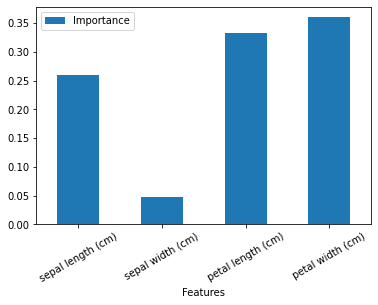

In [20]:
ft_import.plot.bar(x='Features', y='Importance', rot=30)

# Partial Dependency Plots

Shows the marginal effect of a feature on predictions.

Shows effect of predictions when all observations have a feature set to a particular value.


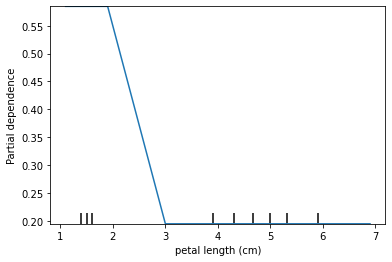

In [21]:
from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(rf, X_train, ['petal length (cm)'], target='setosa')

Target is:  setosa
Target is:  versicolor
Target is:  virginica


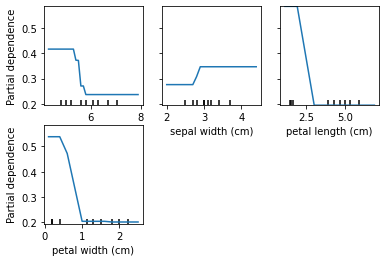

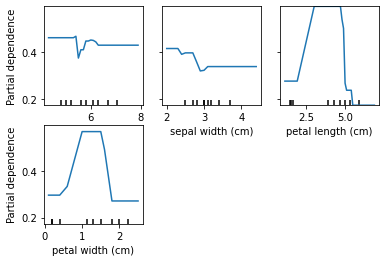

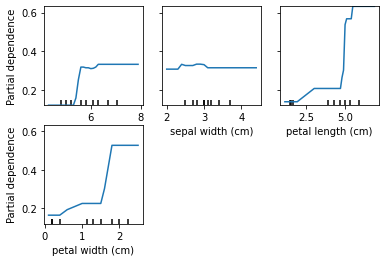

In [22]:
for target in data.target_names:
    print('Target is: ', target)
    plot_partial_dependence(rf, X_train, data.feature_names, target=target)

# Advantages of Random Forests

1. Ensemble model (Wisdom of the Crowd)
1. Good out-of-box performance
1. Multiple trees can be trained at once 

# Cons of Random Forests
1. Expensive to train
2. Can produce very large model files

# Model Comparison and evaluation

1. Which model performed better?
2. Which feature had the most influence on the random forest model?


# Knowledge Check
1. A random forest is the same as combining many decision trees?
1. Name two ways in which random forests are made non-deterministic. 
1. Random forest classifiers are parametric?
1. Name two visuals to help intrepret random forest models.

# Review Objectives 
1. Apply a random forest classifier to a dataset
1. Visualize feature importances from a trained random forest model

# Next Steps
1. Tune the random forest classifier
    1. Number of estimators
    1. Criterion: default is gini, can also try entropy
    1. Max depth, min samples
    1. Number of features
1. Create a random forest regressor and test on sklearn Boston housing data
    1. Compare to decision tree model
    1. Plot feature importances
    1. Create partial dependency plots

# Full Day Activities
1. Code random forest from scratch
1. Code partial dependecy plot function from scratch